**Normal Distribution and Z Score Exercise**

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
After removing outliers in step 1, you get a new dataframe.
On step(2) dataframe, use 4 standard deviation to remove outliers
Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [2]:
#Import statements
import pandas as pd
import google.colab
import seaborn as sn
import numpy as np

In [3]:
# Import dataset
from google.colab import files
files.upload()

Saving bhp.csv to bhp.csv


{'bhp.csv': b'location,size,total_sqft,bath,price,bhk,price_per_sqft\nElectronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699\nChikka Tirupathi,4 Bedroom,2600.0,5.0,120.0,4,4615\nUttarahalli,3 BHK,1440.0,2.0,62.0,3,4305\nLingadheeranahalli,3 BHK,1521.0,3.0,95.0,3,6245\nKothanur,2 BHK,1200.0,2.0,51.0,2,4250\nWhitefield,2 BHK,1170.0,2.0,38.0,2,3247\nOld Airport Road,4 BHK,2732.0,4.0,204.0,4,7467\nRajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181\nMarathahalli,3 BHK,1310.0,3.0,63.25,3,4828\nother,6 Bedroom,1020.0,6.0,370.0,6,36274\nWhitefield,3 BHK,1800.0,2.0,70.0,3,3888\nWhitefield,4 Bedroom,2785.0,5.0,295.0,4,10592\n7th Phase JP Nagar,2 BHK,1000.0,2.0,38.0,2,3800\nGottigere,2 BHK,1100.0,2.0,40.0,2,3636\nSarjapur,3 Bedroom,2250.0,3.0,148.0,3,6577\nMysore Road,2 BHK,1175.0,2.0,73.5,2,6255\nBisuvanahalli,3 BHK,1180.0,3.0,48.0,3,4067\nRaja Rajeshwari Nagar,3 BHK,1540.0,3.0,60.0,3,3896\nother,3 BHK,2770.0,4.0,290.0,3,10469\nother,2 BHK,1100.0,2.0,48.0,2,4363\nKengeri,1 BHK,600.0,1.0,15.0,1,2500\nBi

In [4]:
#Read the dataset
df_bhp = pd.read_csv('bhp.csv')

In [5]:
df_bhp.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
from pandas.core import describe
df_bhp.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Removing outliers using percentile technique.

In [9]:
# Using the pandas quantile function
lower_limit, upper_limit = df_bhp.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [8]:
# Using the numpy quantile function
lower_limit1, upper_limit1 = np.quantile(df_bhp.price_per_sqft,[0.001, 0.999] )
lower_limit1, upper_limit1

(1366.184, 50959.3619999996)

In [10]:
df_bhp.shape

(13200, 7)

In [11]:
#No. of outliers
out_no = df_bhp[(df_bhp.price_per_sqft>upper_limit) | (df_bhp.price_per_sqft<lower_limit)]
out_no.shape

(28, 7)

In [12]:
#Dtata frame without outliers (after step (1))
df_bhp_no_out = df_bhp[(df_bhp.price_per_sqft<upper_limit)&(df_bhp.price_per_sqft>lower_limit)]
df_bhp_no_out.shape

(13172, 7)

In [13]:
mean = df_bhp_no_out.price_per_sqft.mean()
mean

6663.6537351958705

In [14]:
std = df_bhp_no_out.price_per_sqft.std()

In [15]:
lower= mean-(4*std)
lower

-9900.429065502582

In [16]:
higher = mean+(4*std)
higher

23227.73653589432

In [17]:
df_bhp_no_out[(df_bhp_no_out.price_per_sqft>higher)|(df_bhp_no_out.price_per_sqft<lower)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


Using 4 standard deviation to remove outliers

In [18]:
df_bhp_no_out1 = df_bhp_no_out[(df_bhp_no_out.price_per_sqft<higher)&(df_bhp_no_out.price_per_sqft>lower)]

In [19]:
df_bhp_no_out1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [20]:
## Identifying the number of outliers
df_bhp_no_out.shape[0]-df_bhp_no_out1.shape[0]

125

Ploting histogram and bellcurve for the new dataframe.

<Axes: xlabel='price_per_sqft', ylabel='Count'>

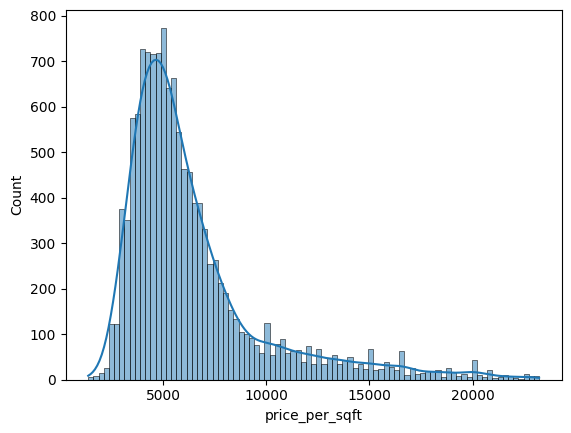

In [21]:
sn.histplot(df_bhp_no_out1.price_per_sqft, kde ='true')

In [22]:
df_bhp_no_out.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [23]:
z_mean = df_bhp_no_out.price_per_sqft.mean()

In [24]:
z_std =  df_bhp_no_out.price_per_sqft.std()

Using zscore of 4 to remove outliers

In [25]:
df_bhp_no_out['z_score'] = (df_bhp_no_out.price_per_sqft-z_mean)/z_std
df_bhp_no_out

<ipython-input-25-a2db60fd9e59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bhp_no_out['z_score'] = (df_bhp_no_out.price_per_sqft-z_mean)/z_std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [27]:
df_bhp_no_out_z = df_bhp_no_out[(df_bhp_no_out.z_score<4)&(df_bhp_no_out.z_score)]

In [30]:
df_bhp_no_out_z.shape

(13047, 8)

In [29]:
# No. of outliers removed
df_bhp_no_out.shape[0]-df_bhp_no_out_z.shape[0]

125